In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import joblib

In [2]:
df = pd.read_csv('data/maildata_cleaned.csv')
print(df.head())


  Category                                            Message  text_length  \
0      ham  Go until jurong point, crazy.. Available only ...          111   
1      ham                      Ok lar... Joking wif u oni...           29   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...          155   
3      ham  U dun say so early hor... U c already then say...           49   
4      ham  Nah I don't think he goes to usf, he lives aro...           61   

                                          clean_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt st m...  
3                u dun say earli hor u c alreadi say  
4          nah dont think goe usf live around though  


In [3]:
df = df.dropna(subset=['clean_text', 'Category'])
df = df[df['clean_text'].str.strip() != '']

In [4]:
X = df['clean_text']
y = df['Category']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [7]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_vect, y_train)


In [8]:
model = MultinomialNB(alpha=0.1)
model.fit(X_train_bal, y_train_bal)

MultinomialNB(alpha=0.1)

In [9]:
y_pred = model.predict(X_test_vect)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       948
        spam       0.92      0.92      0.92       166

    accuracy                           0.98      1114
   macro avg       0.95      0.95      0.95      1114
weighted avg       0.98      0.98      0.98      1114



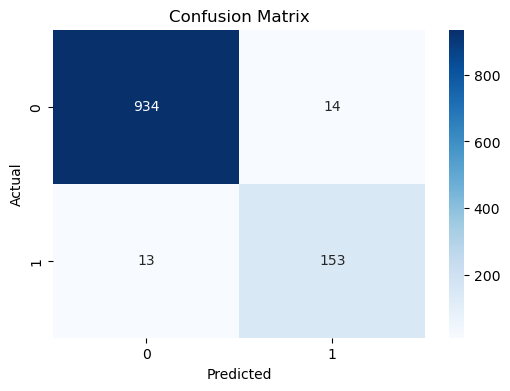

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Accuracy: 0.9758


In [12]:
joblib.dump((vectorizer, model), 'naive_bayes_model.pkl')


['naive_bayes_model.pkl']